## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics, linear_model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import os
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# !pip install pydotplus
import pydotplus
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
os.environ["PATH"] += os.pathsep + 'C:/Users/User/Anaconda3/Lib/site-packages/graphviz-2.38/release/bin'

C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


#### 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果

Answer : 是，將參數進行調整後，其準確度提升變成1.0。

DecisionTreeClassifier(
criterion = 'gini',
max_depth = None,
min_samples_split = 3,
min_samples_leaf = 2,)

In [2]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = None,
    min_samples_split = 3,
    min_samples_leaf = 2,)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  1.0


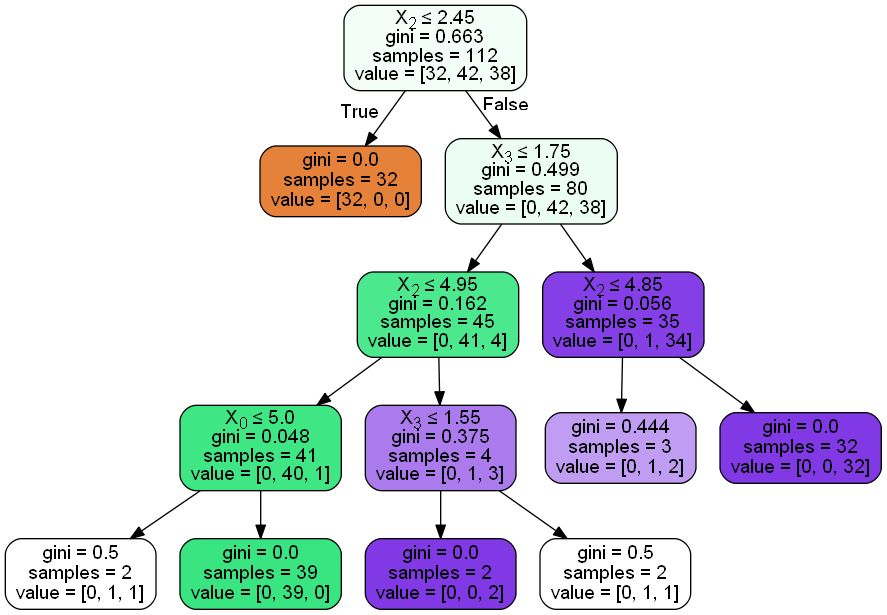

In [4]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

Answer : 利用資料集 (boston, wine)，使用決策樹進行回歸分析的結果優於線性回歸的結果。

In [5]:
boston = datasets.load_boston()
wine = datasets.load_wine()

In [6]:
lreg = linear_model.LinearRegression()
dtreg = DecisionTreeRegressor()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [8]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


In [9]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)
dtreg.fit(x_train, y_train)
y_pred = dtreg.predict(x_test)

In [10]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 24.38


In [11]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)
regr = DecisionTreeClassifier()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [12]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444
